In [2]:
import numpy as np
import PyMieScatt as ps
import matplotlib.pyplot as plt
from scattnlay import scattnlay, fieldnlay

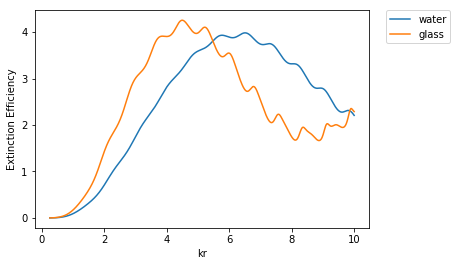

In [3]:
#let us generate plots of the various quantities as a function of kr parameter
#this has been verified with the following source
#http://www.thermopedia.com/content/956/ (see figure 1)

#[1] O. Peña and U. Pal, "Scattering of electromagnetic radiation by a multilayered sphere," 
#Computer Physics Communications, vol. 180, Nov. 2009, pp. 2348-2354.
# [2] K. Ladutenko, U. Pal, A. Rivera and O. Peña-Rodríguez, "Mie calculation of 
#electromagnetic near-field for a multilayered sphere," Computer Physics Communications, vol. 214, May 2017, pp. 225-230.

num_pts = 1000
kr = np.ones((num_pts, 1), dtype = np.float64) 
kr[:,0] = np.linspace(0.25,10, num_pts)

dia  = 2000

m_water = kr - kr + 1.33 + 0*1j
m_glass = kr - kr + 1.45 + 0*1j


terms, Qext_water, Qsca, Qabs, Qbk, Qpr, g, Albedo, S1, S2 = scattnlay(kr, m_water)
terms, Qext_glass, Qsca, Qabs, Qbk, Qpr, g, Albedo, S1, S2 = scattnlay(kr, m_glass)

#qext_water = [ps.MieQ(1.33,np.pi*(dia/ind), dia)[0] for ind in kr]
#qext_glass = [ps.MieQ(1.5,np.pi*(dia/ind), dia)[0] for ind in kr]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('kr')
ax.set_ylabel('Extinction Efficiency')
plt.plot(kr,Qext_water, label='water')
plt.plot(kr,Qext_glass, label='glass')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


#All these plots have no units, it is the ratio of the actual cross section to the physical area. 
# noticing that the kr parameter is an abstraction, we will train the network for extinction efficiency as 
# a function of wavelength (not kr!). 


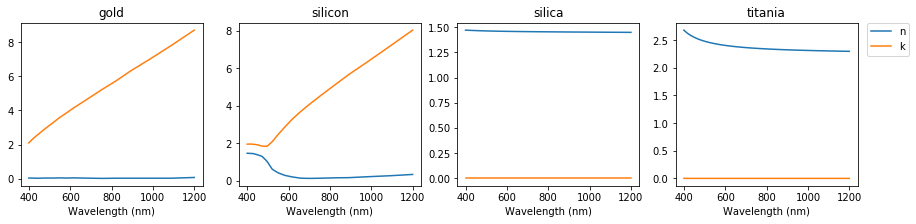

In [4]:
#let us load the dispersion data of some standard materials here

# ./materials/gold.dat
# Gold P. B. Johnson and R. W. Christy. Optical constants of the noble metals, Phys. Rev. B 6, 4370-4379 (1972)

# ./materials/silicon.dat
# Silicon M. A. Green. Self-consistent optical parameters of intrinsic silicon at 
# 300K including temperature coefficients, Sol. Energ. Mat. Sol. Cells 92, 1305–1310 (2008)

# ./materials/silica.dat
#I. H. Malitson. Interspecimen comparison of the refractive index of fused silica, J. Opt. Soc. Am. 55, 1205-1208 (1965)

# ./materials/tio2.dat
#T. Siefke, S. Kroker, K. Pfeiffer, O. Puffky, K. Dietrich, D. Franta, I. Ohlídal, A. Szeghalmi, E.-B. Kley, A. Tünnermann. Materials pushing the application limits of wire grid polarizers further into the deep ultraviolet spectral range, Adv. Opt. Mater. 4, 1780–1786 (2016)


from scipy import interpolate

def get_nk(datafile, wavelengths):
    """Reads the given file and returns the n+ik complex at
    the given wavelength after suitable interpolation
    :datafile: TODO
    :wavelength: TODO
    :returns: TODO
    """
    rawdisp = np.loadtxt(datafile)
    f_r = interpolate.interp1d(rawdisp[:,0], rawdisp[:,1])
    f_i = interpolate.interp1d(rawdisp[:,0], rawdisp[:,2])
    return f_r(wavelengths) + 1j*f_i(wavelengths)

lams = np.linspace(400, 1200,100)
nk_gold = get_nk('./materials/silver.dat', lams)
nk_si = get_nk('./materials/gold.dat', lams)
nk_sio2 = get_nk('./materials/silica.dat', lams)
nk_tio2 = get_nk('./materials/tio2.dat', lams)

#make a materials dictionary
matsdict = {
  1: './materials/gold.dat',
  2: './materials/silicon.dat',
  3: './materials/silica.dat',
  4: './materials/tio2.dat',
  5: './materials/silver.dat'
}

fig = plt.figure(figsize=(15,3))

ax = fig.add_subplot(141)
ax.set_title('gold')
ax.set_xlabel('Wavelength (nm)')
plt.plot(lams, np.real(nk_gold))
plt.plot(lams, np.imag(nk_gold))

ax = fig.add_subplot(142)
ax.set_title('silicon')
ax.set_xlabel('Wavelength (nm)')
plt.plot(lams, np.real(nk_si))
plt.plot(lams, np.imag(nk_si))

ax = fig.add_subplot(143)
ax.set_title('silica')
ax.set_xlabel('Wavelength (nm)')
plt.plot(lams, np.real(nk_sio2))
plt.plot(lams, np.imag(nk_sio2))

ax = fig.add_subplot(144)
ax.set_title('titania')
ax.set_xlabel('Wavelength (nm)')
plt.plot(lams, np.real(nk_tio2), label='n')
plt.plot(lams, np.imag(nk_tio2), label='k')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


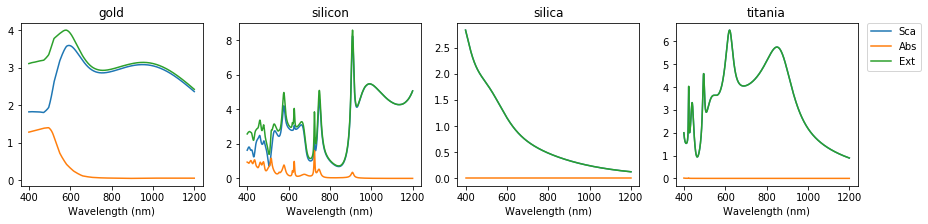

In [5]:
# now we will see the various quantities for a similiarly sized homogenous sphere made of different materials 
num_pts = 1000
dia  =  350
lam_min = 400
lam_max = 1200


lams = np.linspace(lam_min, lam_max, num_pts)
kr = np.ones((num_pts, 1), dtype = np.float64) 
m = kr -kr + 0 + 0*1j
kr[:,0] = np.pi*dia/lams

fig = plt.figure(figsize=(15,3))

#gold
m[:,0] = get_nk('./materials/gold.dat', lams)
terms, Qext, Qsca, Qabs, Qbk, Qpr, g, Albedo, S1, S2 = scattnlay(kr, m)
ax = fig.add_subplot(141)
ax.set_title('gold')
ax.set_xlabel('Wavelength (nm)')
plt.plot(lams, Qsca)
plt.plot(lams, Qabs)
plt.plot(lams, Qext)

#silicon
m[:,0] = get_nk('./materials/silicon.dat', lams)
terms, Qext, Qsca, Qabs, Qbk, Qpr, g, Albedo, S1, S2 = scattnlay(kr, m)
ax = fig.add_subplot(142)
ax.set_title('silicon')
ax.set_xlabel('Wavelength (nm)')
plt.plot(lams, Qsca)
plt.plot(lams, Qabs)
plt.plot(lams, Qext)

#silica
m[:,0] = get_nk('./materials/silica.dat', lams)
terms, Qext, Qsca, Qabs, Qbk, Qpr, g, Albedo, S1, S2 = scattnlay(kr, m)
ax = fig.add_subplot(143)
ax.set_title('silica')
ax.set_xlabel('Wavelength (nm)')
plt.plot(lams, Qsca)
plt.plot(lams, Qabs)
plt.plot(lams, Qext)

#silica
m[:,0] = get_nk('./materials/tio2.dat', lams)
terms, Qext, Qsca, Qabs, Qbk, Qpr, g, Albedo, S1, S2 = scattnlay(kr, m)
ax = fig.add_subplot(144)
ax.set_title('titania')
ax.set_xlabel('Wavelength (nm)')
plt.plot(lams, Qsca, label='Sca')
plt.plot(lams, Qabs, label='Abs')
plt.plot(lams, Qext, label='Ext')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)






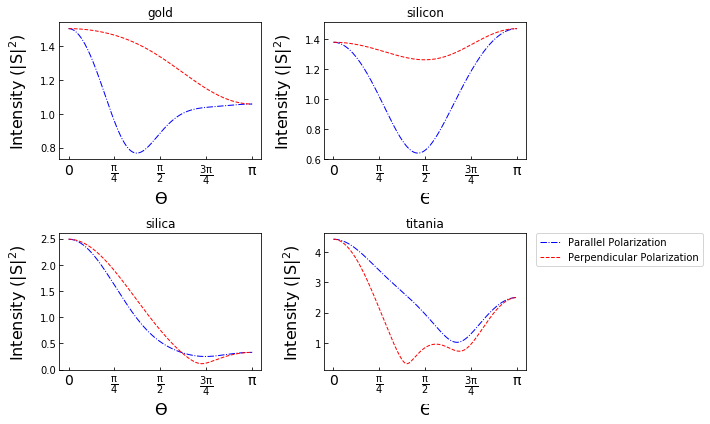

In [6]:
#explore the angular dependence of scattering for various sizes and materials

dia = 350
kr = np.ones((1, 1), dtype = np.float64) 
m = kr -kr + 0 + 0*1j 
theta = np.arange(0.0, 180.25, 0.25, dtype = np.float64)*np.pi/180.0
fig1 = plt.figure(figsize=(10,6))


#gold
lam_res = 805
kr[:,0] = np.pi*dia/lam_res
nkval = get_nk('./materials/gold.dat', lam_res)
m[:,0] = nkval
terms, Qext, Qsca, Qabs, Qbk, Qpr, g, Albedo, S1, S2 = scattnlay(kr, m, theta)
per = np.abs(S1).transpose()
par = np.abs(S2).transpose()
ax1 = fig1.add_subplot(2,2,1)
ax1.plot(theta*180/np.pi,par,'b',ls='dashdot',lw=1,label="Parallel Polarization")
ax1.plot(theta*180/np.pi,per,'r',ls='dashed',lw=1,label="Perpendicular Polarization")
x_label = ["0", r"$\mathregular{\frac{\pi}{4}}$", r"$\mathregular{\frac{\pi}{2}}$",r"$\mathregular{\frac{3\pi}{4}}$",r"$\mathregular{\pi}$"]
x_tick = [0,45, 90, 135, 180]
ax1.set_xticks(x_tick)
ax1.set_xticklabels(x_label,fontsize=14)
ax1.tick_params(which='both',direction='in')
ax1.set_xlabel("ϴ",fontsize=16)
ax1.set_ylabel(r"Intensity ($\mathregular{|S|^2}$)",fontsize=16,labelpad=10)
ax1.set_title('gold')

#silicon
lam_res = 1050
kr[:,0] = np.pi*dia/lam_res
nkval = get_nk('./materials/silicon.dat', lam_res)
m[:,0] = nkval
terms, Qext, Qsca, Qabs, Qbk, Qpr, g, Albedo, S1, S2 = scattnlay(kr, m, theta)
ver = np.abs(S1).transpose()
hor = np.abs(S2).transpose()
ax1 = fig1.add_subplot(2,2,2)
ax1.plot(theta*180/np.pi,hor,'b',ls='dashdot',lw=1,label="Parallel Polarization")
ax1.plot(theta*180/np.pi,ver,'r',ls='dashed',lw=1,label="Perpendicular Polarization")
x_label = ["0", r"$\mathregular{\frac{\pi}{4}}$", r"$\mathregular{\frac{\pi}{2}}$",r"$\mathregular{\frac{3\pi}{4}}$",r"$\mathregular{\pi}$"]
x_tick = [0,45, 90, 135, 180]
ax1.set_xticks(x_tick)
ax1.set_xticklabels(x_label,fontsize=14)
ax1.tick_params(which='both',direction='in')
ax1.set_xlabel("ϴ",fontsize=16)
ax1.set_ylabel(r"Intensity ($\mathregular{|S|^2}$)",fontsize=16,labelpad=10)
ax1.set_title('silicon')

#silica
lam_res = 575
kr[:,0] = np.pi*dia/lam_res
nkval = get_nk('./materials/silica.dat', lam_res)
m[:,0] = nkval
terms, Qext, Qsca, Qabs, Qbk, Qpr, g, Albedo, S1, S2 = scattnlay(kr, m, theta)
ver = np.abs(S1).transpose()
hor = np.abs(S2).transpose()
ax1 = fig1.add_subplot(2,2,3)
ax1.plot(theta*180/np.pi,hor,'b',ls='dashdot',lw=1,label="Parallel Polarization")
ax1.plot(theta*180/np.pi,ver,'r',ls='dashed',lw=1,label="Perpendicular Polarization")
x_label = ["0", r"$\mathregular{\frac{\pi}{4}}$", r"$\mathregular{\frac{\pi}{2}}$",r"$\mathregular{\frac{3\pi}{4}}$",r"$\mathregular{\pi}$"]
x_tick = [0,45, 90, 135, 180]
ax1.set_xticks(x_tick)
ax1.set_xticklabels(x_label,fontsize=14)
ax1.tick_params(which='both',direction='in')
ax1.set_xlabel("ϴ",fontsize=16)
ax1.set_ylabel(r"Intensity ($\mathregular{|S|^2}$)",fontsize=16,labelpad=10)
ax1.set_title('silica')

#titania
lam_res = 600
kr[:,0] = np.pi*dia/lam_res
nkval = get_nk('./materials/tio2.dat', lam_res)
m[:,0] = nkval
terms, Qext, Qsca, Qabs, Qbk, Qpr, g, Albedo, S1, S2 = scattnlay(kr, m, theta)
ver = np.abs(S1).transpose()
hor = np.abs(S2).transpose()
ax1 = fig1.add_subplot(2,2,4)
ax1.plot(theta*180/np.pi,hor,'b',ls='dashdot',lw=1,label="Parallel Polarization")
ax1.plot(theta*180/np.pi,ver,'r',ls='dashed',lw=1,label="Perpendicular Polarization")
x_label = ["0", r"$\mathregular{\frac{\pi}{4}}$", r"$\mathregular{\frac{\pi}{2}}$",r"$\mathregular{\frac{3\pi}{4}}$",r"$\mathregular{\pi}$"]
x_tick = [0,45, 90, 135, 180]
ax1.set_xticks(x_tick)
ax1.set_xticklabels(x_label,fontsize=14)
ax1.tick_params(which='both',direction='in')
ax1.set_xlabel("ϴ",fontsize=16)
ax1.set_ylabel(r"Intensity ($\mathregular{|S|^2}$)",fontsize=16,labelpad=10)
ax1.set_title('titania')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)


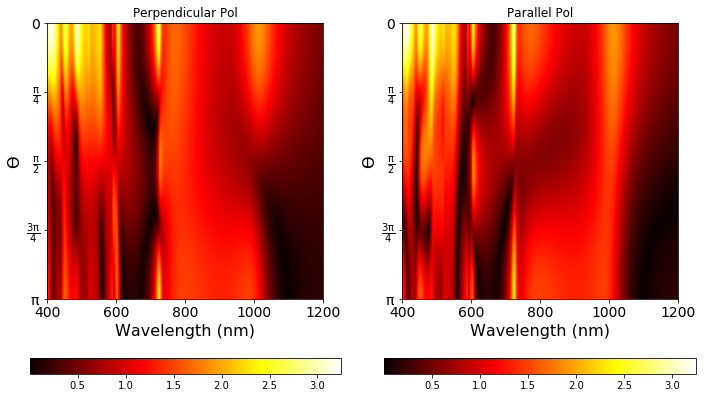

In [7]:
#now let us plot simultaneously over wavelengths and angles
from pylab import figure, cm
from matplotlib.colors import LogNorm



dia = 270
num_pts = 1000
lam_min = 400
lam_max = 1200

fig1 = plt.figure(figsize=(10,6))

lams = np.linspace(lam_min, lam_max, num_pts)
kr = np.ones((num_pts, 1), dtype = np.float64) 
m = kr -kr + 0 + 0*1j


kr[:,0] = np.pi*dia/lams
m[:,0] = get_nk('./materials/silicon.dat', lams)
theta = np.linspace(0.0, 180, num_pts, dtype = np.float64)*np.pi/180.0

terms, Qext, Qsca, Qabs, Qbk, Qpr, g, Albedo, S1, S2 = scattnlay(kr, m, theta)

per = np.abs(S1).transpose()
par = np.abs(S2).transpose()


ax1 = fig1.add_subplot(1,2,1)
plt.imshow(per, cmap='hot')
#ax1.matshow(per, cmap=cm.gray_r, norm=LogNorm(vmin=0.01, vmax=1))
y_label = ["0", r"$\mathregular{\frac{\pi}{4}}$", r"$\mathregular{\frac{\pi}{2}}$",r"$\mathregular{\frac{3\pi}{4}}$",r"$\mathregular{\pi}$"]
y_tick = [0, 250, 500, 750, 1000]
ax1.set_yticks(y_tick)
ax1.set_yticklabels(y_label,fontsize=14)
ax1.tick_params(which='both',direction='out')
ax1.set_ylabel("ϴ",fontsize=16)
x_label = ['400', '600','800', '1000','1200']
x_tick = [0,250, 500, 750, 1000]
ax1.set_xticks(x_tick)
ax1.set_xticklabels(x_label,fontsize=14)
ax1.tick_params(which='both',direction='out')
ax1.set_xlabel("Wavelength (nm)",fontsize=16)
ax1.set_title('Perpendicular Pol')
plt.colorbar(orientation ='horizontal')

ax1 = fig1.add_subplot(1,2,2)
plt.imshow(par, cmap='hot')
y_label = ["0", r"$\mathregular{\frac{\pi}{4}}$", r"$\mathregular{\frac{\pi}{2}}$",r"$\mathregular{\frac{3\pi}{4}}$",r"$\mathregular{\pi}$"]
y_tick = [0, 250, 500, 750, 1000]
ax1.set_yticks(y_tick)
ax1.set_yticklabels(y_label,fontsize=14)
ax1.tick_params(which='both',direction='out')
ax1.set_ylabel("ϴ",fontsize=16)
x_label = ['400', '600','800', '1000','1200']
x_tick = [0,250, 500, 750, 1000]
ax1.set_xticks(x_tick)
ax1.set_xticklabels(x_label,fontsize=14)
ax1.tick_params(which='both',direction='out')
ax1.set_xlabel("Wavelength (nm)",fontsize=16)
ax1.set_title('Parallel Pol')
plt.colorbar(orientation ='horizontal')

plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)

Here are some papers that talk of multilayered nanoparticles

F. Monticone and A. Alù, "Multi-layered plasmonic cloaks to engineer the scattering signature of resonant nanoparticles," Proceedings of the 2012 IEEE International Symposium on Antennas and Propagation, Chicago, IL, 2012, pp. 1-2.   https://ieeexplore.ieee.org/document/6349265/

Kalele, Suchita, et al. "Synthesis and characterization of silica—titania core—shell particles." Pramana 65.5 (2005): 787-791.

Mayya, K. Subramanya, David I. Gittins, and Frank Caruso. "Gold− titania core− shell nanoparticles by polyelectrolyte complexation with a titania precursor." Chemistry of materials 13.11 (2001): 3833-3836.

Voshchinnikov, Nikolai V., and John S. Mathis. "Calculating cross sections of composite interstellar grains." The Astrophysical Journal 526.1 (1999): 257.
 Wu Z.P., Wang Y.P.

Electromagnetic scattering for multilaered spheres: recursive algorithms
Radio Science 1991. V. 26. P. 1393-1401.
(note that this method has a problem when kr > 20, i.e. in the limit of very very large particles)

[70, 70, 70, 70, 30, 30, 30, 30]


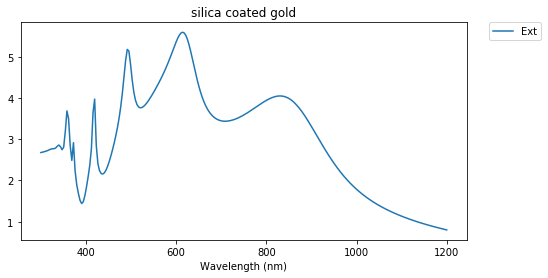

In [34]:
# make a function that will return the x and m matrices of 
# any given multilayered spherical particle
# these can then be passed on to scattnlay
def make_xm(sizes, mats, lams):
    x = np.ones((len(lams), len(sizes)), dtype = np.float64)
    m = x - x + 0 + 0*1j
    sizes = np.cumsum(sizes)
    for s, size in enumerate(sizes):
        x[:,s] = np.pi*size/lams
        m[:,s] = get_nk(matsdict[mats[s]], lams)
    theta = np.linspace(0.0, 180, num_pts, dtype = np.float64)*np.pi/180.0
    return x, m, theta

fig1 = plt.figure(figsize=(8,4))


# mutilayered 
size_min = 30
size_max = 70

size = [70, 70, 70, 70, 30, 30, 30, 30]    # each layer thickness


#size = np.array(np.random.randint(size_min,size_max,8))
print(size)
mats = [3, 4, 3, 4, 3, 4, 3, 4]       # 2 - silicon, silicon.dat,   1 - gold,  gold.dat 
                    # 3 - silica,  silica.dat,    4 - titania,  tio2.dat 
num_pts = 250
lam_min = 300
lam_max = 1200
lams = np.linspace(lam_min, lam_max, num_pts)   
theta = np.linspace(0.0, 180, num_pts, dtype = np.float64)*np.pi/180.0

kr, m, theta = make_xm(size, mats, lams)
terms, Qext, Qsca, Qabs, Qbk, Qpr, g, Albedo, S1, S2 = scattnlay(kr, m)

ax = fig1.add_subplot(1,1,1)
ax.set_title('silica coated gold')
ax.set_xlabel('Wavelength (nm)')
#plt.plot(lams, Qsca, label='Sca')
#plt.plot(lams, Qabs, label='Abs')
plt.plot(lams, Qext, label='Ext')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
np.savetxt('qestsave.txt', Qext)

In [13]:

# Now we need to create a dataset and save it to disk
import h5py
dataset_size = 5

# parameters of the dataset
num_layers = 8
num_lpoints = 250
lam_min = 300
lam_max = 1200
size_min = 30
size_max = 70

mats = [3, 4, 3, 4, 3, 4, 3, 4]       # 2 - silicon, silicon.dat,   1 - gold,  gold.dat 
                                      # 3 - silica,  silica.dat,    4 - titania,  tio2.dat 
#generate a huge array and then reshape
dataset_X = np.random.randint(size_min,size_max,num_layers*dataset_size).astype(float).reshape(dataset_size, num_layers)
lams = np.linspace(lam_min, lam_max, num_lpoints)   
dataset_Y = np.zeros((dataset_size,num_lpoints))

for ind in np.arange(dataset_size):
    kr, m, theta = make_xm(dataset_X[ind,:], mats, lams)
    terms, dataset_Y[ind,:], Qsca, Qabs, Qbk, Qpr, g, Albedo, S1, S2 = scattnlay(kr, m)
 

h5f = h5py.File('scatter8.h5', 'w')
h5f.create_dataset('sizes', data=dataset_X)
h5f.create_dataset('spectrum', data=dataset_Y)
h5f.close()
